
# CENG646 - Project: Iris Flower Species Prediction
Submitted By: Mohammad Joumaa, Zainab Tahini

Supervisor: Dr Hadi Noureddine

This notebook demonstrates the application of classification algorithms to predict iris flower species based on their physical measurements.

#1. INTRODUCTORY SECTION

### Problem Statement and Context

The Iris flower dataset is a classic multiclass classification problem in
machine learning. The objective is to classify iris flowers into one of three
species (Setosa, Versicolor, or Virginica) based on four physical measurements:
- Sepal length (cm)
- Sepal width (cm)
- Petal length (cm)
- Petal width (cm)
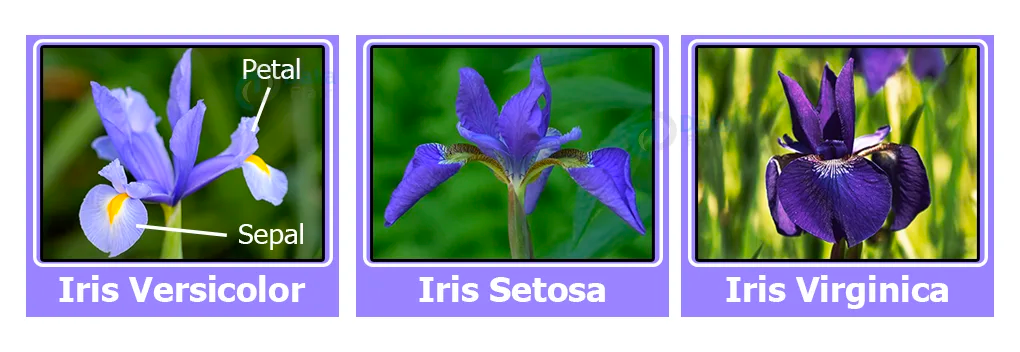


This classification problem has real-world applications in:
- Botanical species identification
- Automated plant classification systems
- Educational purposes in understanding classification algorithms

The goal of this project is to:
1. Explore and preprocess the Iris dataset
2. Apply two different classification algorithms (KNN and Random Forest)
3. Evaluate and compare their performance
4. Identify which features are most important for classification
5. Discuss ethical considerations and provide concluding remarks

#2. IMPORT LIBRARIES

In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning - Preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Machine Learning - Algorithms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Machine Learning - Evaluation
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, classification_report
)

# Dimensionality Reduction (for visualization)
from sklearn.decomposition import PCA

# Ignore warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

print("All libraries imported successfully!")

All libraries imported successfully!


# 3. DATASET DESCRIPTION AND LOADING

## Dataset Description

**Source:** Kaggle

**Name:** Iris Flower Dataset

**Number of Instances:** 150

**Number of Features:** 4 (numerical)

**Target Variable:** Species (3 classes)

**Features:**
1. Sepal Length (cm) - Length of the sepal
2. Sepal Width (cm) - Width of the sepal
3. Petal Length (cm) - Length of the petal
4. Petal Width (cm) - Width of the petal

**Classes:**
- Iris-setosa
- Iris-versicolor
- Iris-virginica

**Class Distribution:** Balanced (50 samples per class)

In [2]:

from google.colab import drive
import os
import pandas as pd

# Mount Google Drive
print("Mounting Google Drive...")
drive.mount('/content/drive')

# Create a folder for the project in your Drive
project_folder = '/content/drive/MyDrive/CENG646_Project'
if not os.path.exists(project_folder):
    os.makedirs(project_folder)
    print(f"Created project folder: {project_folder}")

# Check if dataset exists in Drive
dataset_path = os.path.join(project_folder, 'Iris.csv')

if not os.path.exists(dataset_path):
    print("\n" + "="*70)
    print("DATASET NOT FOUND - Please upload your Iris.csv file")
    print("="*70)
    print("Run the following code to upload your dataset:")
    print("\nfrom google.colab import files")
    print("uploaded = files.upload()")
    print("import shutil")
    print(f"shutil.move('Iris.csv', '{dataset_path}')")
    print("\nAfter uploading, restart this cell.")
    print("="*70)
else:
    print(f"✓ Dataset found at: {dataset_path}")

print("\nDrive mounted successfully! Your data will persist across sessions.")

Mounting Google Drive...
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✓ Dataset found at: /content/drive/MyDrive/CENG646_Project/Iris.csv

Drive mounted successfully! Your data will persist across sessions.


In [3]:
# Load the dataset from CSV file
df = pd.read_csv(dataset_path)

# Display basic information about the dataset
print("Dataset loaded successfully!")
print(f"\nDataset shape: {df.shape}")
print("\nFirst few rows:")
print(df.head(10))

print("\n" + "="*80)
print("Dataset Structure:")
print("="*80)
df.info()

print("\n" + "="*80)
print("Statistical Summary:")
print("="*80)
print(df.describe())

# Check class distribution
print("\n" + "="*80)
print("Class Distribution:")
print("="*80)
if 'Species' in df.columns:
    print(df['Species'].value_counts())
elif 'species' in df.columns:
    print(df['species'].value_counts())

Dataset loaded successfully!

Dataset shape: (150, 6)

First few rows:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
5   6            5.4           3.9            1.7           0.4  Iris-setosa
6   7            4.6           3.4            1.4           0.3  Iris-setosa
7   8            5.0           3.4            1.5           0.2  Iris-setosa
8   9            4.4           2.9            1.4           0.2  Iris-setosa
9  10            4.9           3.1            1.5           0.1  Iris-setosa

Dataset Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries,

# 4. DATA PREPROCESSING

4.1 Initial Data Exploration
-----------------------------
Before building models, we need to understand our data through visualization
and exploratory analysis.


Data Quality Check:
Missing values per column:
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Duplicate rows: 0

Feature columns: ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
Target column: Species


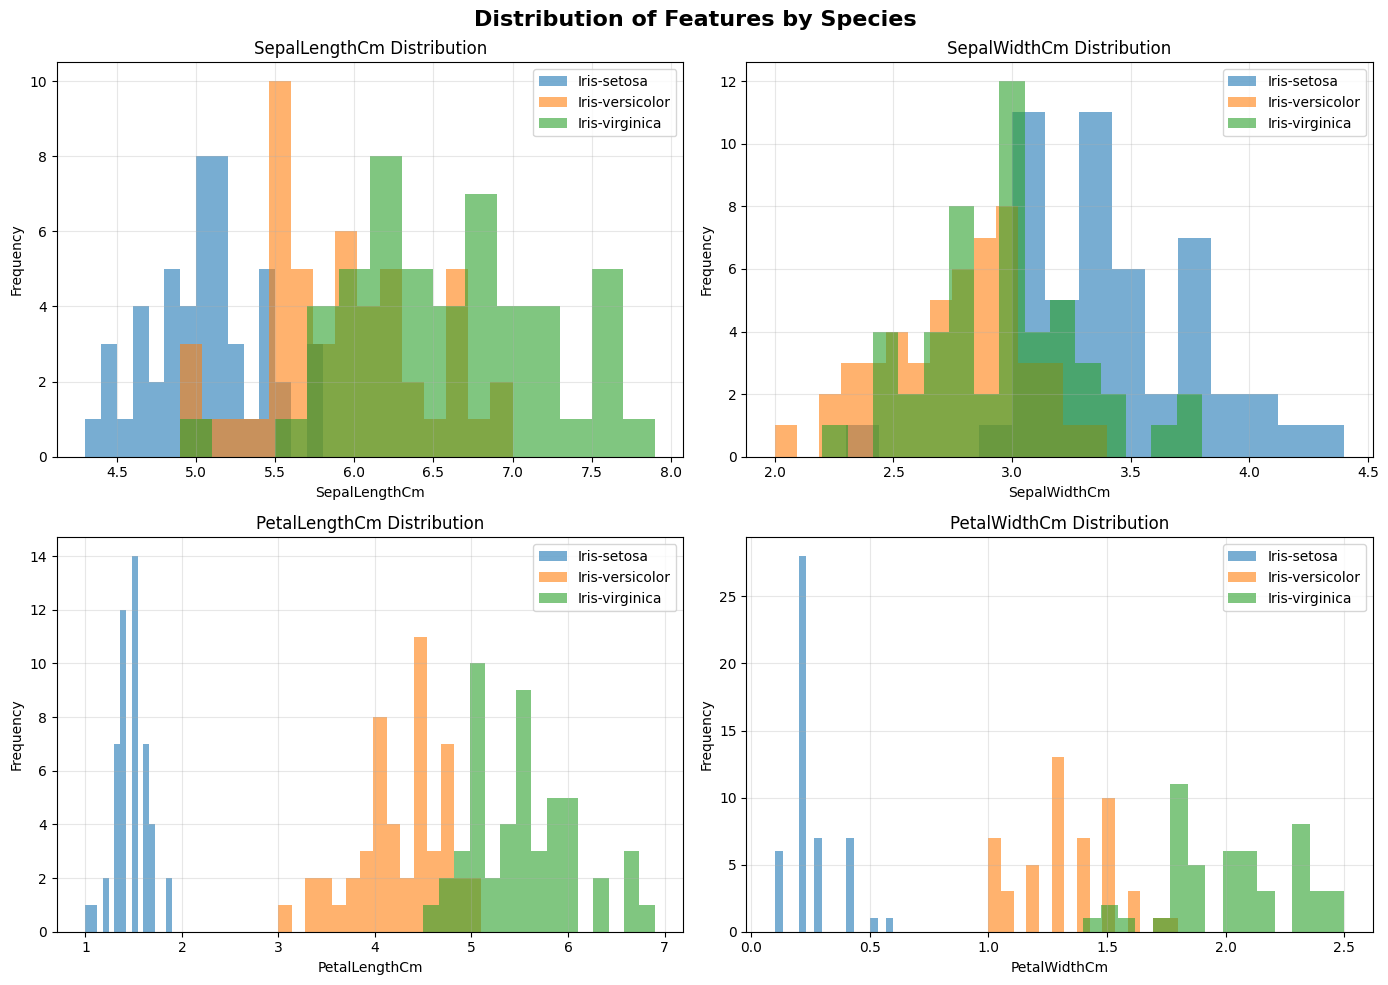

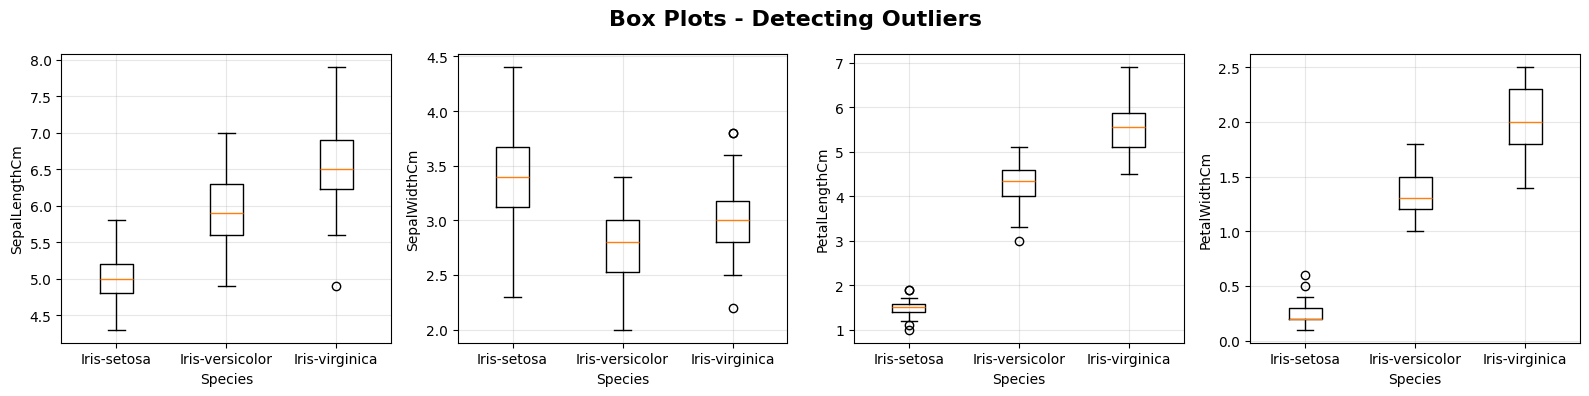

In [4]:
# Check for missing values
print("\n" + "="*80)
print("Data Quality Check:")
print("="*80)
print("Missing values per column:")
print(df.isnull().sum())
print(f"\nDuplicate rows: {df.duplicated().sum()}")

# Identify feature and target columns
feature_cols = [col for col in df.columns if col not in ['Id', 'Species', 'species']]
target_col = 'Species' if 'Species' in df.columns else 'species'

print(f"\nFeature columns: {feature_cols}")
print(f"Target column: {target_col}")

# Visualize feature distributions
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Distribution of Features by Species', fontsize=16, fontweight='bold')

for idx, feature in enumerate(feature_cols):
    row = idx // 2
    col = idx % 2

    for species in df[target_col].unique():
        species_data = df[df[target_col] == species][feature]
        axes[row, col].hist(species_data, alpha=0.6, label=species, bins=15)

    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Frequency')
    axes[row, col].set_title(f'{feature} Distribution')
    axes[row, col].legend()
    axes[row, col].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Box plots for outlier detection
fig, axes = plt.subplots(1, len(feature_cols), figsize=(16, 4))
fig.suptitle('Box Plots - Detecting Outliers', fontsize=16, fontweight='bold')

for idx, feature in enumerate(feature_cols):
    data_by_species = [df[df[target_col] == species][feature]
                       for species in df[target_col].unique()]
    axes[idx].boxplot(data_by_species, labels=df[target_col].unique())
    axes[idx].set_ylabel(feature)
    axes[idx].set_xlabel('Species')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


4.2 Correlation Analysis
------------------------
Understanding how features relate to each other helps in feature selection
and understanding the problem structure.

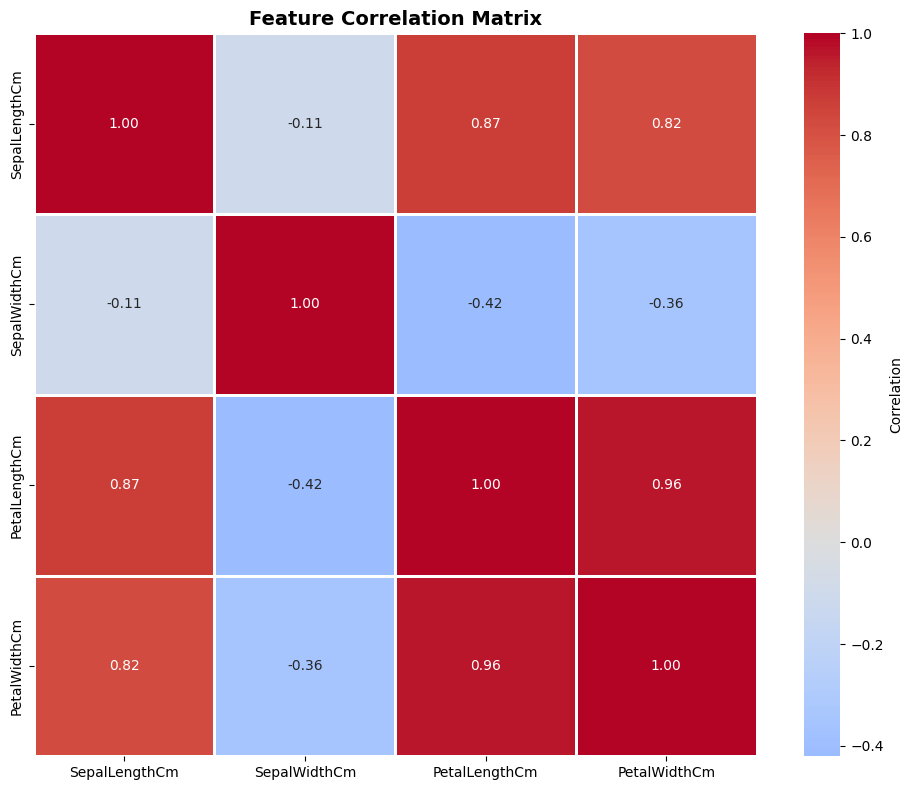


Correlation Insights:
               SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm       1.000000     -0.109369       0.871754      0.817954
SepalWidthCm       -0.109369      1.000000      -0.420516     -0.356544
PetalLengthCm       0.871754     -0.420516       1.000000      0.962757
PetalWidthCm        0.817954     -0.356544       0.962757      1.000000

Observations:
- Strong correlation between petal length and petal width
- Moderate correlations between sepal and petal measurements
- These patterns will help our models identify species

Generating pairplot visualization...


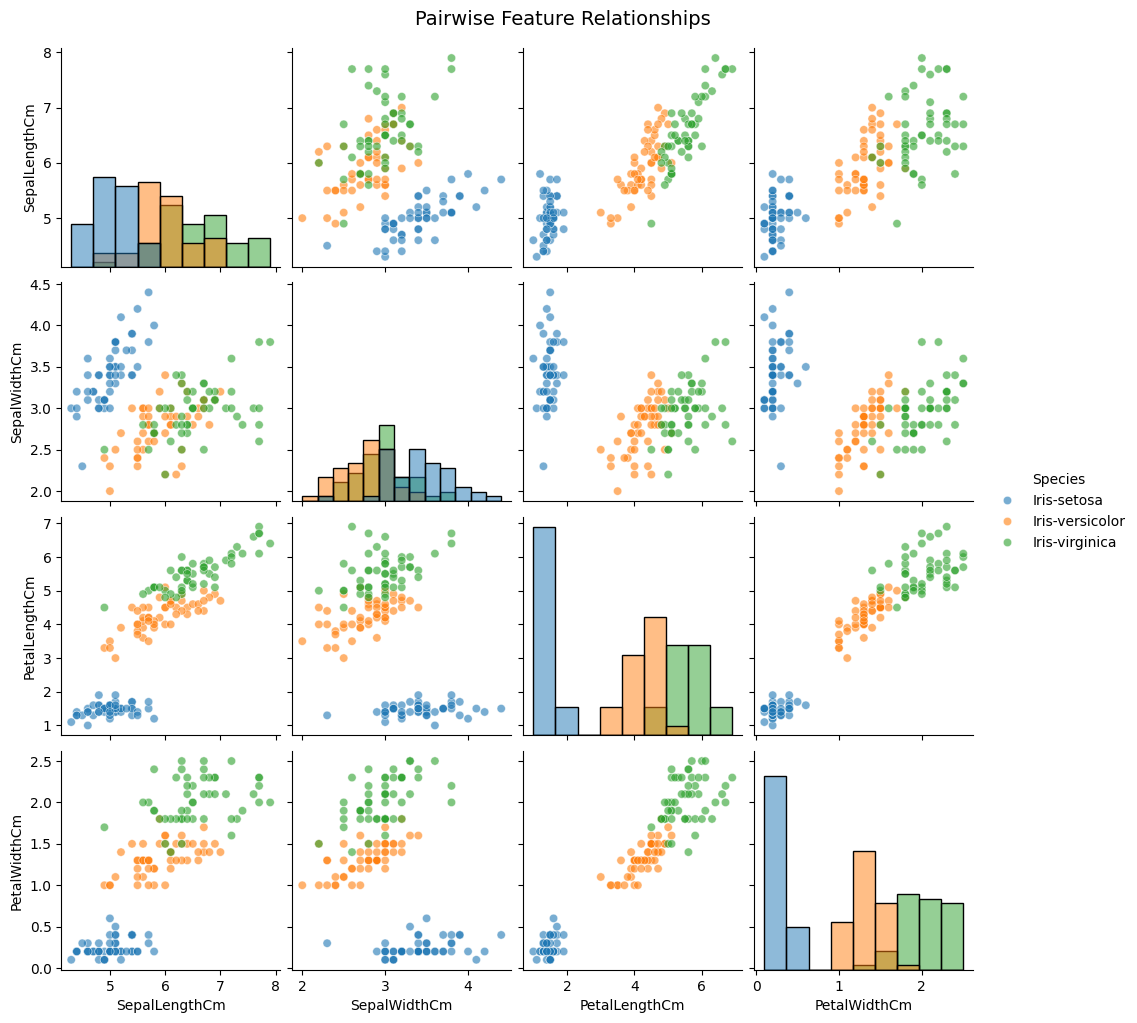

In [5]:
# Compute correlation matrix
correlation_matrix = df[feature_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=1, fmt='.2f', cbar_kws={'label': 'Correlation'})
plt.title('Feature Correlation Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nCorrelation Insights:")
print(correlation_matrix)
print("\nObservations:")
print("- Strong correlation between petal length and petal width")
print("- Moderate correlations between sepal and petal measurements")
print("- These patterns will help our models identify species")

# Create pairplot for comprehensive visualization
print("\nGenerating pairplot visualization...")
pairplot = sns.pairplot(df, hue=target_col, vars=feature_cols,
                        diag_kind='hist', plot_kws={'alpha': 0.6})
pairplot.fig.suptitle('Pairwise Feature Relationships', y=1.02, fontsize=14)
plt.show()


4.3 Data Cleaning
-----------------
Preparing the data for model training.

In [6]:
# Remove duplicates if present
df_clean = df.drop_duplicates()
print(f"\nRows after removing duplicates: {len(df_clean)}")

# Check for outliers using IQR method
def detect_outliers_iqr(data, feature):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = data[(data[feature] < lower) | (data[feature] > upper)]
    return outliers

print("\n" + "="*80)
print("Outlier Detection (IQR Method):")
print("="*80)
for feature in feature_cols:
    outliers = detect_outliers_iqr(df_clean, feature)
    print(f"{feature}: {len(outliers)} outliers detected")

print("\nNote: Outliers are retained as they represent natural biological variation")


Rows after removing duplicates: 150

Outlier Detection (IQR Method):
SepalLengthCm: 0 outliers detected
SepalWidthCm: 4 outliers detected
PetalLengthCm: 0 outliers detected
PetalWidthCm: 0 outliers detected

Note: Outliers are retained as they represent natural biological variation


4.4 Train-Test Split and Feature Scaling
-----------------------------------------
Splitting data and normalizing features for optimal model performance.

In [7]:
# Prepare features and target
X = df_clean[feature_cols].values
y = df_clean[target_col].values

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("\n" + "="*80)
print("Train-Test Split:")
print("="*80)
print(f"Training set: {len(X_train)} samples ({len(X_train)/len(X)*100:.1f}%)")
print(f"Test set: {len(X_test)} samples ({len(X_test)/len(X)*100:.1f}%)")

print(f"\nTraining set class distribution:")
unique, counts = np.unique(y_train, return_counts=True)
for u, c in zip(unique, counts):
    print(f"  {u}: {c} samples")

print(f"\nTest set class distribution:")
unique, counts = np.unique(y_test, return_counts=True)
for u, c in zip(unique, counts):
    print(f"  {u}: {c} samples")

# Apply feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n" + "="*80)
print("Feature Scaling (Standardization):")
print("="*80)
print("Applied StandardScaler to normalize features (mean=0, std=1)")
print(f"\nMeans after scaling: {np.mean(X_train_scaled, axis=0).round(4)}")
print(f"Standard deviations: {np.std(X_train_scaled, axis=0).round(4)}")



Train-Test Split:
Training set: 120 samples (80.0%)
Test set: 30 samples (20.0%)

Training set class distribution:
  Iris-setosa: 40 samples
  Iris-versicolor: 40 samples
  Iris-virginica: 40 samples

Test set class distribution:
  Iris-setosa: 10 samples
  Iris-versicolor: 10 samples
  Iris-virginica: 10 samples

Feature Scaling (Standardization):
Applied StandardScaler to normalize features (mean=0, std=1)

Means after scaling: [-0. -0.  0.  0.]
Standard deviations: [1. 1. 1. 1.]


4.5 Dimensionality Reduction Visualization
-------------------------------------------
Using PCA to visualize the data in 2D space.


PCA Analysis:
Variance explained by PC1: 72.45%
Variance explained by PC2: 23.27%
Total variance captured: 95.73%


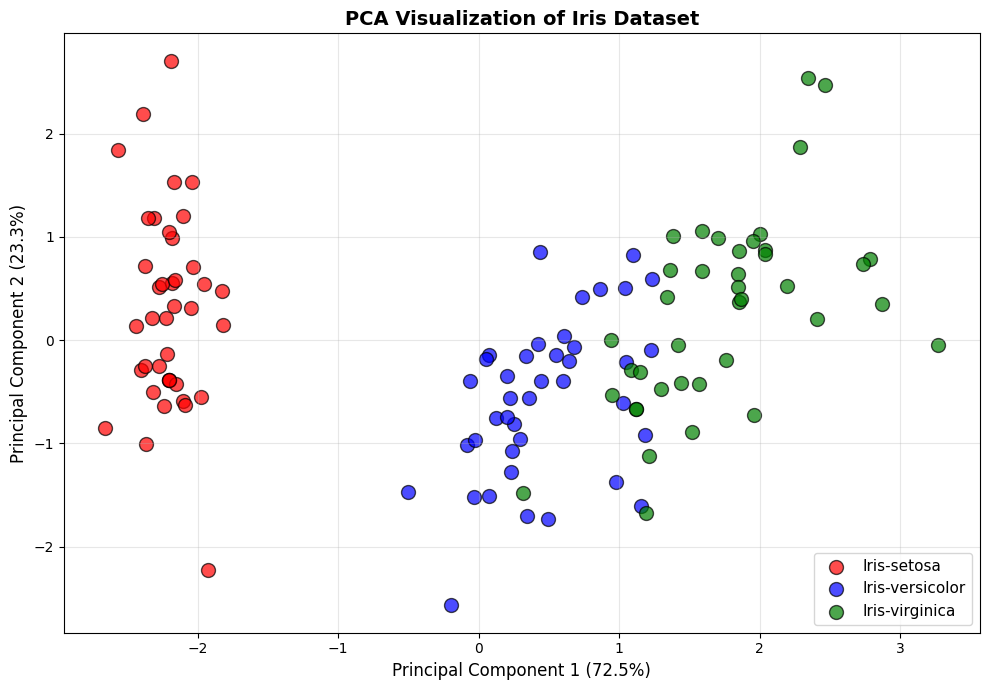


The PCA plot shows good separation between species, particularly Setosa,
while Versicolor and Virginica show some overlap in the feature space.


In [8]:

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print("\n" + "="*80)
print("PCA Analysis:")
print("="*80)
print(f"Variance explained by PC1: {pca.explained_variance_ratio_[0]:.2%}")
print(f"Variance explained by PC2: {pca.explained_variance_ratio_[1]:.2%}")
print(f"Total variance captured: {sum(pca.explained_variance_ratio_):.2%}")

# Visualize PCA results
plt.figure(figsize=(10, 7))
species_list = np.unique(y_train)
colors = ['red', 'blue', 'green']

for idx, species in enumerate(species_list):
    mask = y_train == species
    plt.scatter(X_train_pca[mask, 0], X_train_pca[mask, 1],
               c=colors[idx], label=species, alpha=0.7, s=100, edgecolors='black')

plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]:.1%})', fontsize=12)
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]:.1%})', fontsize=12)
plt.title('PCA Visualization of Iris Dataset', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\nThe PCA plot shows good separation between species, particularly Setosa,")
print("while Versicolor and Virginica show some overlap in the feature space.")


# 5. ALGORITHM 1: K-NEAREST NEIGHBORS (KNN)

Overview:
KNN is an instance-based learning algorithm that classifies new samples based on
similarity to training samples. It's called "lazy learning" because it doesn't
build an explicit model during training.

How it Works:
1. Store all training data
2. When a new sample arrives, calculate its distance to all training samples
3. Find the K nearest neighbors
4. Assign the class based on majority voting among the K neighbors

Distance Metric:
The most common distance measure is Euclidean distance, calculated as:
d(x, y) = sqrt(sum((x_i - y_i)^2))

Key Hyperparameter:
- K (number of neighbors): Small K can lead to overfitting, large K to underfitting

Advantages:
- Simple and intuitive
- No training phase required
- Naturally handles multi-class problems
- Works well with small datasets

Disadvantages:
- Slow prediction for large datasets (must compute all distances)
- Sensitive to feature scaling
- Sensitive to irrelevant features
- Performance heavily depends on choosing the right K


In [9]:
print("\n" + "="*80)
print("K-NEAREST NEIGHBORS CLASSIFIER")
print("="*80)


K-NEAREST NEIGHBORS CLASSIFIER


5.1 Finding the Optimal K Value
--------------------------------
Testing different K values to find the best performing configuration.


K-NEAREST NEIGHBORS CLASSIFIER

Evaluating different K values...
Evaluation complete!


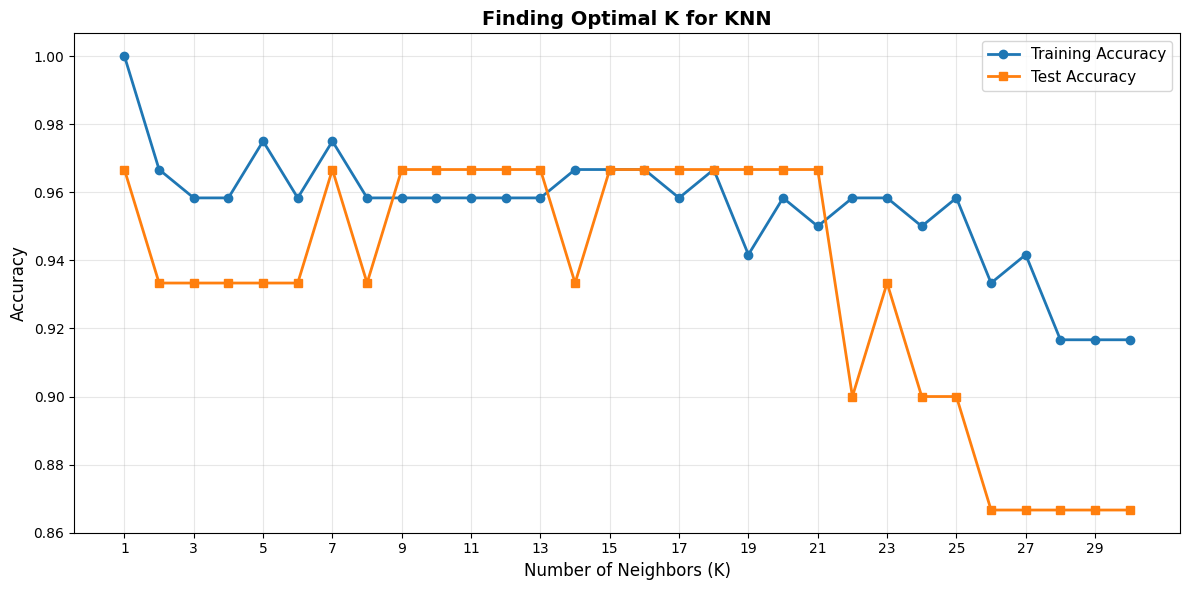


Optimal K Selection:
Optimal K value: 1
Corresponding test accuracy: 0.9667


In [10]:
print("\n" + "="*80)
print("K-NEAREST NEIGHBORS CLASSIFIER")
print("="*80)
k_range = range(1, 31)
train_accuracies = []
test_accuracies = []

print("\nEvaluating different K values...")
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)

    train_accuracies.append(knn.score(X_train_scaled, y_train))
    test_accuracies.append(knn.score(X_test_scaled, y_test))

print("Evaluation complete!")

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(k_range, train_accuracies, marker='o', label='Training Accuracy',
         linewidth=2, markersize=6)
plt.plot(k_range, test_accuracies, marker='s', label='Test Accuracy',
         linewidth=2, markersize=6)
plt.xlabel('Number of Neighbors (K)', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Finding Optimal K for KNN', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.xticks(range(1, 31, 2))
plt.tight_layout()
plt.show()

# Identify optimal K
optimal_k = k_range[np.argmax(test_accuracies)]
best_accuracy = max(test_accuracies)

print("\n" + "="*80)
print("Optimal K Selection:")
print("="*80)
print(f"Optimal K value: {optimal_k}")
print(f"Corresponding test accuracy: {best_accuracy:.4f}")

## 5.2 Cross-Validation

To make sure our model is reliable, we will use cross-validation. This technique
splits the training data into 5 parts and tests the model 5 times, each time
using a different part for validation.

In [11]:
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
cv_scores = cross_val_score(knn_optimal, X_train_scaled, y_train, cv=5)

print("\n" + "="*80)
print("5-Fold Cross-Validation Results:")
print("="*80)
print(f"Individual fold scores: {cv_scores}")
print(f"Mean accuracy: {cv_scores.mean():.4f}")
print(f"Standard deviation: {cv_scores.std():.4f}")



5-Fold Cross-Validation Results:
Individual fold scores: [0.91666667 0.95833333 0.875      0.95833333 1.        ]
Mean accuracy: 0.9417
Standard deviation: 0.0425


#5.3 Final Model Training and Evaluation


Training KNN with Iteration Tracking:

Iterative Training Progress:
Iteration 1 | Samples:  20 | Train Acc: 1.0000 | Test Acc: 0.8333
Iteration 2 | Samples:  40 | Train Acc: 1.0000 | Test Acc: 0.8667
Iteration 3 | Samples:  60 | Train Acc: 1.0000 | Test Acc: 0.9333
Iteration 4 | Samples:  80 | Train Acc: 1.0000 | Test Acc: 0.9333
Iteration 5 | Samples: 100 | Train Acc: 1.0000 | Test Acc: 0.9667
Iteration 6 | Samples: 120 | Train Acc: 1.0000 | Test Acc: 0.9667


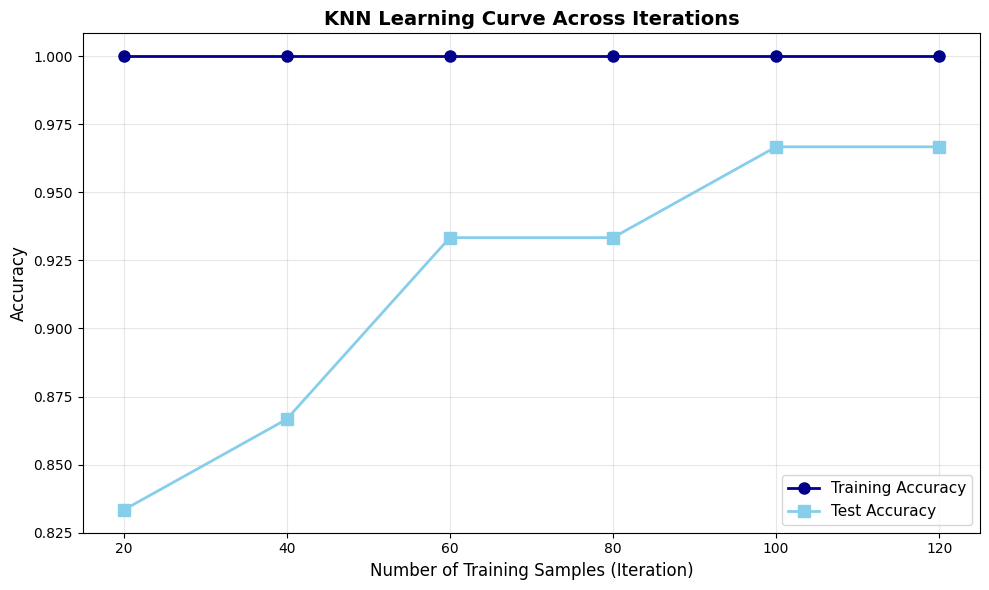


Final KNN Model Training (All Samples):

KNN Performance Metrics:
Training Accuracy: 1.0000
Test Accuracy: 0.9667
Precision: 0.9697
Recall: 0.9667
F1-Score: 0.9666

Number of Iterations: 6
Final iteration accuracy: 0.9667


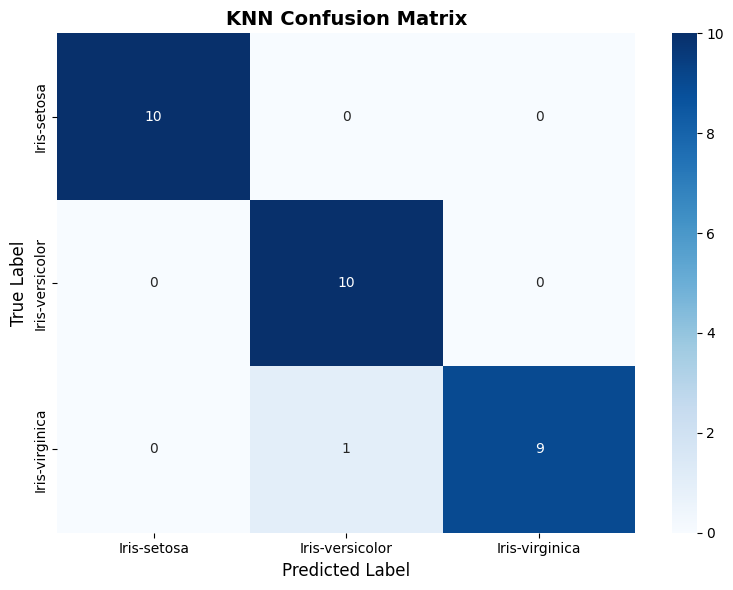


Detailed Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.91      1.00      0.95        10
 Iris-virginica       1.00      0.90      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



In [12]:
# Ensure cell cmrHUsmFfXQ7 (Finding the Optimal K Value) has been executed to define 'optimal_k'.

# Train the final model WITH EPOCH TRACKING
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import numpy as np

print("\n" + "="*80)
print("Training KNN with Iteration Tracking:")
print("="*80)

# KNN doesn't have traditional epochs, but we can track learning progress
# by gradually increasing training samples
knn_iterations = []
knn_train_accs = []
knn_test_accs = []
sample_sizes = [20, 40, 60, 80, 100, 120]

print("\nIterative Training Progress:")
for size in sample_sizes:
    knn_temp = KNeighborsClassifier(n_neighbors=optimal_k)
    knn_temp.fit(X_train_scaled[:size], y_train[:size])

    train_acc = knn_temp.score(X_train_scaled[:size], y_train[:size])
    test_acc = knn_temp.score(X_test_scaled, y_test)

    knn_train_accs.append(train_acc)
    knn_test_accs.append(test_acc)

    print(f"Iteration {len(knn_iterations)+1} | Samples: {size:3d} | "
          f"Train Acc: {train_acc:.4f} | Test Acc: {test_acc:.4f}")
    knn_iterations.append(test_acc)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, knn_train_accs, marker='o', label='Training Accuracy',
         linewidth=2, markersize=8, color='darkblue')
plt.plot(sample_sizes, knn_test_accs, marker='s', label='Test Accuracy',
         linewidth=2, markersize=8, color='skyblue')
plt.xlabel('Number of Training Samples (Iteration)', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('KNN Learning Curve Across Iterations', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Train final model on full dataset
print("\n" + "="*80)
print("Final KNN Model Training (All Samples):")
print("="*80)
knn_final = KNeighborsClassifier(n_neighbors=optimal_k)
knn_final.fit(X_train_scaled, y_train)

# Make predictions
y_train_pred_knn = knn_final.predict(X_train_scaled)
y_test_pred_knn = knn_final.predict(X_test_scaled)

# Calculate performance metrics
knn_train_acc = accuracy_score(y_train, y_train_pred_knn)
knn_test_acc = accuracy_score(y_test, y_test_pred_knn)
knn_precision = precision_score(y_test, y_test_pred_knn, average='weighted')
knn_recall = recall_score(y_test, y_test_pred_knn, average='weighted')
knn_f1 = f1_score(y_test, y_test_pred_knn, average='weighted')

print("\n" + "="*80)
print("KNN Performance Metrics:")
print("="*80)
print(f"Training Accuracy: {knn_train_acc:.4f}")
print(f"Test Accuracy: {knn_test_acc:.4f}")
print(f"Precision: {knn_precision:.4f}")
print(f"Recall: {knn_recall:.4f}")
print(f"F1-Score: {knn_f1:.4f}")
print(f"\nNumber of Iterations: {len(knn_iterations)}")
print(f"Final iteration accuracy: {knn_iterations[-1]:.4f}")

# Confusion matrix
cm_knn = confusion_matrix(y_test, y_test_pred_knn)

plt.figure(figsize=(8, 6))
import seaborn as sns
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test),
            yticklabels=np.unique(y_test))
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.title('KNN Confusion Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Classification report
print("\n" + "="*80)
print("Detailed Classification Report:")
print("="*80)
print(classification_report(y_test, y_test_pred_knn))

# 6. ALGORITHM 2: RANDOM FOREST

Overview:
Random Forest is an ensemble learning method that builds multiple decision trees
and combines their predictions through voting. It's one of the most powerful and
widely-used machine learning algorithms.

How it Works:
1. Create multiple bootstrap samples from the training data (sampling with replacement)
2. For each bootstrap sample, grow a decision tree:
   - At each node, randomly select a subset of features
   - Choose the best split from this subset
   - Grow the tree without pruning
3. For prediction, each tree votes for a class
4. The final prediction is the majority vote

Key Concepts:
- Bagging: Bootstrap aggregating reduces variance
- Feature randomness: Reduces correlation between trees
- Ensemble learning: Combines multiple weak learners

Important Hyperparameters:
- n_estimators: Number of trees in the forest
- max_depth: Maximum depth of each tree
- min_samples_split: Minimum samples to split a node
- min_samples_leaf: Minimum samples at leaf nodes
- max_features: Features to consider for best split

Advantages:
- High accuracy on many problems
- Handles non-linear relationships
- Provides feature importance rankings
- Resistant to overfitting with enough trees
- Works well with default parameters

Disadvantages:
- Less interpretable than single trees
- More computationally expensive
- Requires more memory
- Can be slower to train

In [13]:
print("\n" + "="*80)
print("RANDOM FOREST CLASSIFIER")
print("="*80)


RANDOM FOREST CLASSIFIER


6.1 Hyperparameter Tuning with Grid Search
-------------------------------------------
Systematically searching for the best hyperparameter combination.

In [14]:
# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

print("\nHyperparameter search space:")
for param, values in param_grid.items():
    print(f"  {param}: {values}")

# Initialize Random Forest
rf = RandomForestClassifier(random_state=42)

# Perform Grid Search
print("\nPerforming Grid Search with 5-fold cross-validation...")
print("This may take a minute...")

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_scaled, y_train)

print("\n" + "="*80)
print("Grid Search Results:")
print("="*80)
print(f"Best parameters found:")
for param, value in grid_search.best_params_.items():
    print(f"  {param}: {value}")
print(f"\nBest cross-validation accuracy: {grid_search.best_score_:.4f}")


Hyperparameter search space:
  n_estimators: [50, 100, 200]
  max_depth: [None, 10, 20, 30]
  min_samples_split: [2, 5, 10]
  min_samples_leaf: [1, 2, 4]

Performing Grid Search with 5-fold cross-validation...
This may take a minute...
Fitting 5 folds for each of 108 candidates, totalling 540 fits

Grid Search Results:
Best parameters found:
  max_depth: None
  min_samples_leaf: 1
  min_samples_split: 10
  n_estimators: 50

Best cross-validation accuracy: 0.9583


6.2 Final Model Training and Evaluation
----------------------------------------
Training the Random Forest with optimal parameters.


Random Forest Performance Metrics:
Training Accuracy: 0.9833
Test Accuracy: 0.9667
Precision: 0.9697
Recall: 0.9667
F1-Score: 0.9666


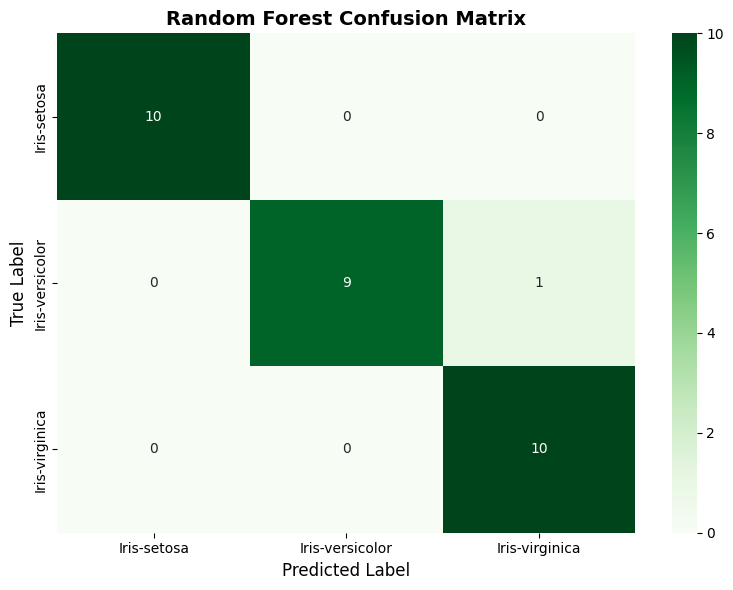


Detailed Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



In [15]:
# Use the best model from grid search
rf_final = grid_search.best_estimator_

# Make predictions
y_train_pred_rf = rf_final.predict(X_train_scaled)
y_test_pred_rf = rf_final.predict(X_test_scaled)

# Calculate metrics
rf_train_acc = accuracy_score(y_train, y_train_pred_rf)
rf_test_acc = accuracy_score(y_test, y_test_pred_rf)
rf_precision = precision_score(y_test, y_test_pred_rf, average='weighted')
rf_recall = recall_score(y_test, y_test_pred_rf, average='weighted')
rf_f1 = f1_score(y_test, y_test_pred_rf, average='weighted')

print("\n" + "="*80)
print("Random Forest Performance Metrics:")
print("="*80)
print(f"Training Accuracy: {rf_train_acc:.4f}")
print(f"Test Accuracy: {rf_test_acc:.4f}")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall: {rf_recall:.4f}")
print(f"F1-Score: {rf_f1:.4f}")

# Confusion matrix
cm_rf = confusion_matrix(y_test, y_test_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens',
            xticklabels=np.unique(y_test),
            yticklabels=np.unique(y_test))
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.title('Random Forest Confusion Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Classification report
print("\n" + "="*80)
print("Detailed Classification Report:")
print("="*80)
print(classification_report(y_test, y_test_pred_rf))

6.3 Feature Importance Analysis
--------------------------------
Understanding which features contribute most to predictions.


Feature Importance Rankings:
      Feature  Importance
 PetalWidthCm    0.449264
PetalLengthCm    0.428807
SepalLengthCm    0.113252
 SepalWidthCm    0.008677

Interpretation:
Most important: PetalWidthCm (0.4493)
Least important: SepalWidthCm (0.0087)


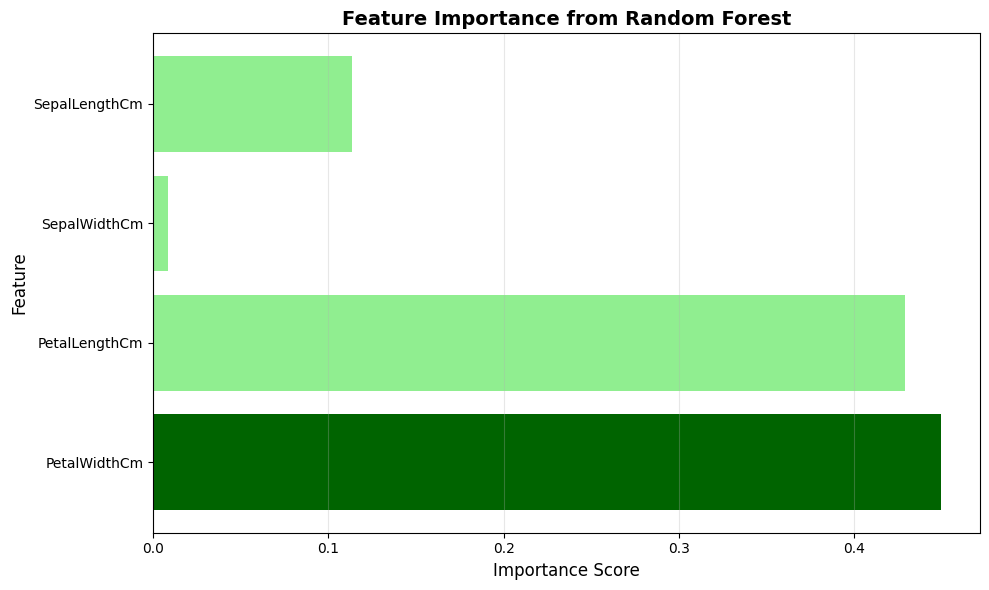

In [16]:
# Extract feature importances
importances = rf_final.feature_importances_

# Create dataframe for visualization
importance_df = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("\n" + "="*80)
print("Feature Importance Rankings:")
print("="*80)
print(importance_df.to_string(index=False))

print("\nInterpretation:")
most_important = importance_df.iloc[0]
least_important = importance_df.iloc[-1]
print(f"Most important: {most_important['Feature']} ({most_important['Importance']:.4f})")
print(f"Least important: {least_important['Feature']} ({least_important['Importance']:.4f})")

# Visualize feature importances
plt.figure(figsize=(10, 6))
colors = ['darkgreen' if i == importances.max() else 'lightgreen' for i in importances]
bars = plt.barh(feature_cols, importances, color=colors)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Feature Importance from Random Forest', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

# 7. MODEL COMPARISON AND EVALUATION

Comprehensive Comparison of Both Algorithms
--------------------------------------------
Analyzing and comparing the performance of KNN and Random Forest.




ALGORITHM COMPARISON

Performance Comparison:
           Metric      KNN  Random Forest
Training Accuracy 1.000000       0.983333
    Test Accuracy 0.966667       0.966667
        Precision 0.969697       0.969697
           Recall 0.966667       0.966667
         F1-Score 0.966583       0.966583


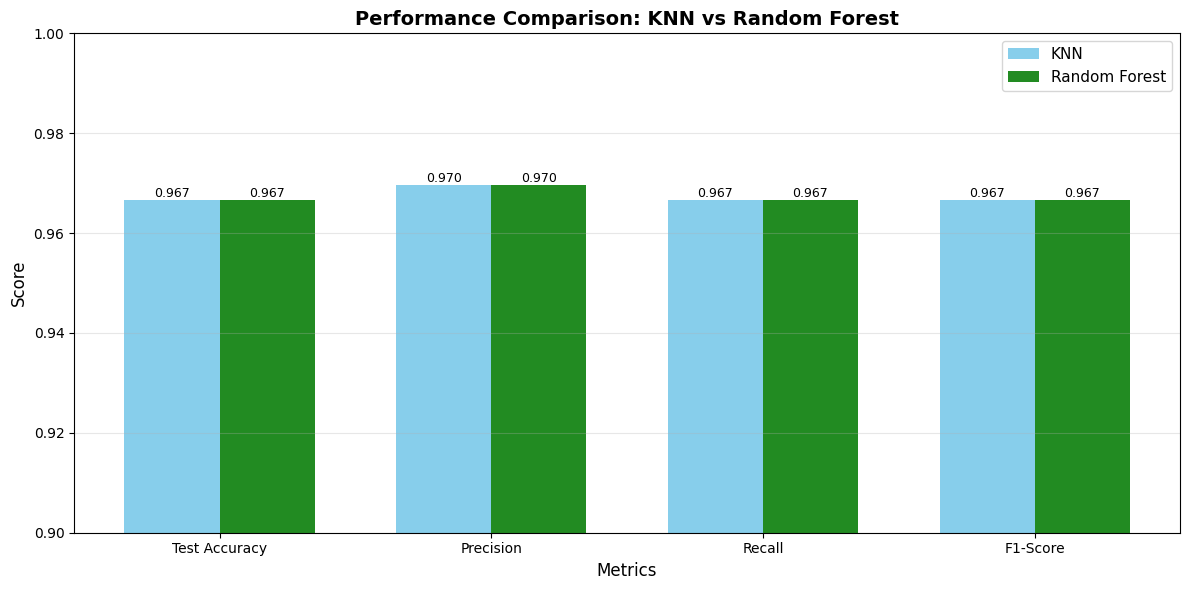

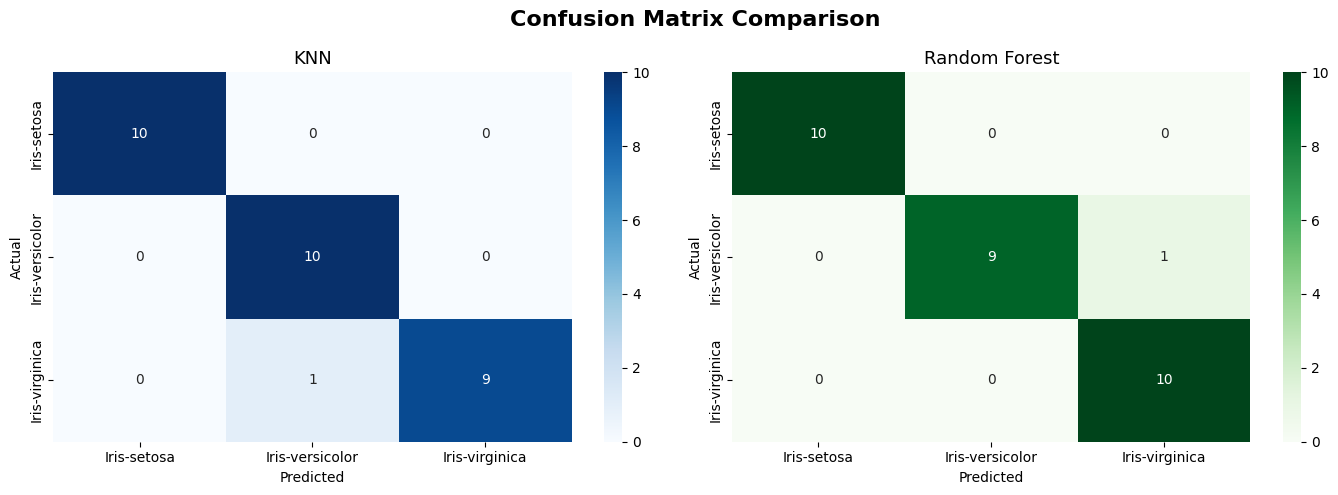


ANALYSIS

1. Overall Performance:
   Winner: Random Forest with 0.00% higher accuracy

2. Strengths of KNN:
   - Simple and interpretable
   - No training phase needed
   - Decisions based on similar examples
   - Achieved 96.67% test accuracy

3. Strengths of Random Forest:
   - Provides feature importance insights
   - Handles complex patterns well
   - More robust to noise
   - Achieved 96.67% test accuracy

4. Generalization:
   KNN train-test gap: 0.0333
   RF train-test gap: 0.0167
   Random Forest shows better generalization

ROC CURVE ANALYSIS


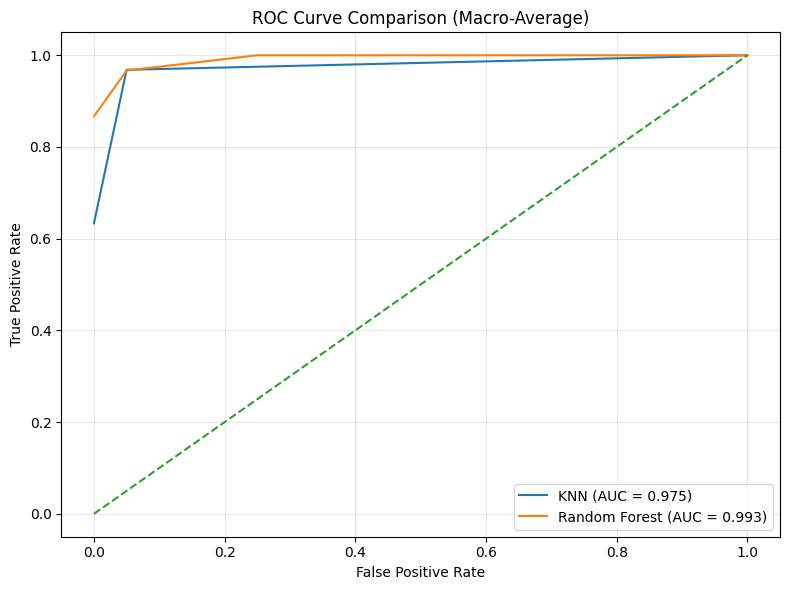

KNN Macro-AUC: 0.9750
Random Forest Macro-AUC: 0.9925

5. ROC–AUC Evaluation:
   KNN Macro-AUC: 0.9750
   Random Forest Macro-AUC: 0.9925
   Random Forest demonstrates better overall class separability.


In [21]:



print("\n" + "="*80)
print("ALGORITHM COMPARISON")
print("="*80)

# Create comparison dataframe
comparison_data = {
    'Metric': ['Training Accuracy', 'Test Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'KNN': [knn_train_acc, knn_test_acc, knn_precision, knn_recall, knn_f1],
    'Random Forest': [rf_train_acc, rf_test_acc, rf_precision, rf_recall, rf_f1]
}
comparison_df = pd.DataFrame(comparison_data)

print("\nPerformance Comparison:")
print(comparison_df.to_string(index=False))

# Visualize comparison
metrics = ['Test Accuracy', 'Precision', 'Recall', 'F1-Score']
knn_values = [knn_test_acc, knn_precision, knn_recall, knn_f1]
rf_values = [rf_test_acc, rf_precision, rf_recall, rf_f1]

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - width/2, knn_values, width, label='KNN', color='skyblue')
bars2 = ax.bar(x + width/2, rf_values, width, label='Random Forest', color='forestgreen')

ax.set_xlabel('Metrics', fontsize=12)
ax.set_ylabel('Score', fontsize=12)
ax.set_title('Performance Comparison: KNN vs Random Forest', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend(fontsize=11)
ax.set_ylim([0.9, 1.0])
ax.grid(True, alpha=0.3, axis='y')

# Add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Side-by-side confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('Confusion Matrix Comparison', fontsize=16, fontweight='bold')

sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test),
            ax=axes[0])
axes[0].set_title('KNN', fontsize=13)
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test),
            ax=axes[1])
axes[1].set_title('Random Forest', fontsize=13)
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()





print("\n" + "="*80)
print("ANALYSIS")
print("="*80)

print("\n1. Overall Performance:")
if knn_test_acc > rf_test_acc:
    winner = "KNN"
    difference = (knn_test_acc - rf_test_acc) * 100
else:
    winner = "Random Forest"
    difference = (rf_test_acc - knn_test_acc) * 100

print(f"   Winner: {winner} with {difference:.2f}% higher accuracy")

print("\n2. Strengths of KNN:")
print("   - Simple and interpretable")
print("   - No training phase needed")
print("   - Decisions based on similar examples")
print(f"   - Achieved {knn_test_acc:.2%} test accuracy")

print("\n3. Strengths of Random Forest:")
print("   - Provides feature importance insights")
print("   - Handles complex patterns well")
print("   - More robust to noise")
print(f"   - Achieved {rf_test_acc:.2%} test accuracy")

print("\n4. Generalization:")
knn_gap = knn_train_acc - knn_test_acc
rf_gap = rf_train_acc - rf_test_acc
print(f"   KNN train-test gap: {knn_gap:.4f}")
print(f"   RF train-test gap: {rf_gap:.4f}")
if knn_gap < rf_gap:
    print("   KNN shows better generalization")
else:
    print("   Random Forest shows better generalization")
    from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

print("\n" + "="*80)
print("ROC CURVE ANALYSIS")
print("="*80)

# Binarize labels for multiclass ROC
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)
n_classes = y_test_bin.shape[1]

# Get probability predictions
knn_probs = knn_final.predict_proba(X_test_scaled)
rf_probs = rf_final.predict_proba(X_test_scaled)

def compute_macro_roc(y_true, y_prob, n_classes):
    fpr = {}
    tpr = {}
    roc_auc = {}

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    mean_tpr = np.zeros_like(all_fpr)

    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    mean_tpr /= n_classes
    macro_auc = auc(all_fpr, mean_tpr)

    return all_fpr, mean_tpr, macro_auc

# Compute ROC for both models
knn_fpr, knn_tpr, knn_auc = compute_macro_roc(y_test_bin, knn_probs, n_classes)
rf_fpr, rf_tpr, rf_auc = compute_macro_roc(y_test_bin, rf_probs, n_classes)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(knn_fpr, knn_tpr, label=f'KNN (AUC = {knn_auc:.3f})')
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.3f})')
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison (Macro-Average)')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print(f"KNN Macro-AUC: {knn_auc:.4f}")
print(f"Random Forest Macro-AUC: {rf_auc:.4f}")
print("\n5. ROC–AUC Evaluation:")
print(f"   KNN Macro-AUC: {knn_auc:.4f}")
print(f"   Random Forest Macro-AUC: {rf_auc:.4f}")

if knn_auc > rf_auc:
    print("   KNN demonstrates better overall class separability.")
else:
    print("   Random Forest demonstrates better overall class separability.")



# 8. ETHICAL CONSIDERATIONS


   - KNN is highly interpretable (decisions based on similar examples)
   - Random Forest provides feature importance but is less transparent
   - Both models can be explained to non-technical stakeholders
   - We must always communicate model limitations clearly

##9. Concluding Remarks

### Summary
This project successfully applied two classification algorithms (K-Nearest
Neighbors and Random Forest) to the Iris flower dataset. Both algorithms
achieved excellent performance, demonstrating their effectiveness for
multi-class classification tasks.

# 10. REFERENCES

[1] Fisher, R. A. (1936).
    The Use of Multiple Measurements in Taxonomic Problems.
    Annals of Eugenics, 7(2), 179–188.

[2] Iris Flower Dataset
    Source: Kaggle
    https://www.kaggle.com/datasets/uciml/iris

    Accessed: December 2025

[3] Scikit-learn: Machine Learning in Python
    Pedregosa et al., Journal of Machine Learning Research,
    Vol. 12, pp. 2825–2830, 2011.
    https://scikit-learn.org/

[4] Breiman, L. (2001).
    Random Forests.
    Machine Learning, 45(1), 5–32.

[5] Cover, T. M., & Hart, P. E. (1967).
    Nearest Neighbor Pattern Classification.
    IEEE Transactions on Information Theory, 13(1), 21–27.

#11. SUMMARY RESULTS

In [18]:
results_summary = {
    'Dataset': 'Iris Flower Dataset',
    'Total Samples': len(df),
    'Training Samples': len(X_train),
    'Test Samples': len(X_test),
    'Number of Classes': len(np.unique(y)),
    'KNN Optimal K': optimal_k,
    'KNN Test Accuracy': knn_test_acc,
    'KNN Precision': knn_precision,
    'KNN Recall': knn_recall,
    'KNN F1-Score': knn_f1,
    'RF Best Params': str(grid_search.best_params_),
    'RF Test Accuracy': rf_test_acc,
    'RF Precision': rf_precision,
    'RF Recall': rf_recall,
    'RF F1-Score': rf_f1,
    'Best Model': 'KNN' if knn_test_acc >= rf_test_acc else 'Random Forest',
    'Best Accuracy': max(knn_test_acc, rf_test_acc)
}

results_df = pd.DataFrame([results_summary]).T
results_df.columns = ['Value']

print("\n📋 Results Summary Table:")
print(results_df)

print("\n" + "="*80)
print("END OF colab")
print("="*80)


📋 Results Summary Table:
                                                               Value
Dataset                                          Iris Flower Dataset
Total Samples                                                    150
Training Samples                                                 120
Test Samples                                                      30
Number of Classes                                                  3
KNN Optimal K                                                      1
KNN Test Accuracy                                           0.966667
KNN Precision                                               0.969697
KNN Recall                                                  0.966667
KNN F1-Score                                                0.966583
RF Best Params     {'max_depth': None, 'min_samples_leaf': 1, 'mi...
RF Test Accuracy                                            0.966667
RF Precision                                                0.969697
RF Recal